# The Winding Number and the SSH model

The Chern number isn't the only topological invariant.  We have multiple invariants, each conveniet in their own situations.  The Chern number just happened to describe the first topological band structure in condensed matter physics, the Integer Quantum Hall Effect, but the winding number actually occurs much more often in a wider variety of circumstances.

How many times does the phase wrap as we transverse a closed loop?
$$
n = \frac{1}{2 \pi i } \oint \text{d}\phi =
\frac{1}{2\pi i } \oint \frac{\text{d}z}{z}
$$

This type of expression shows up in complex analysis with <i>Residues</i> and [the Cauchy Integral Formula](https://en.wikipedia.org/wiki/Cauchy%27s_integral_formula). 

Here, we're interested in using it in the context of topology:

## Topology and Homotopy

<b>Topology</b> is a general umbrella term for studying properties independent of deformation or coordinate systems.  If we go back to "what does topology formally mean?",it's a structure we can put on sets.  From there, we have a variety of different ways to study that structure, and one of those is <b>Homotopy</b>.

<b>Homotopy</b> considers two functions and asks whether or not they can be deformed into each other.  

Here's a simple example:

We have positions $\vec{x}(t)$ over time with a fixed starting and stopping point.  And we have some immovable puncture point in space our function can never occupy (like the origin).  We can classify all the possible paths by the number of times they go around the puncture point.

![homotopy shapes](homotopy.svg)

Our domain of interest is the unit circle for $k$, and we want to know what the range looks like in terms of unit circles:
* Zero unit circles= a point?
* One Unit Circle ?
* A Unit Circle followed by another Unit Circle ?
* A Unit Circle, but flipped and traveled in the opposite direction?

Each of these is a different homotopy class.  

# Su-Schrieffer-Heeger Model for Trans-polyacetlyene

Ahh!!! Organic Chemistry!!!

This specific model is actually about the properties of Polyacetylene, IUPAC polyethyne, (C<sub>2</sub>H<sub>2</sub>)<sub>n</sub> in the <it>trans</it> configuration:
![trans-polyacetylene](images/SSH/chemstruct.png)

But all we really need to know about this molecule is that we have two different types on bonds (single bond and double bond) alternating along one dimension.  

We want to examine electrons hopping around along this line, and the two different bonds correspond to two different transition probabilities. 
![just hopping in 1D](ssh_hopping.svg)
We can write this down in a Hamiltonian 
\begin{equation}
\mathcal{H}= v \sum_i \left(a_i^{\dagger} b_i + \text{h.c.} \right)
-w \sum_i \left(b_i^{\dagger} a_{i+1} + \text{h.c.} \right)
\end{equation}

Don't ask me why $v$ and $w$.  That's what people use for this model.  If someone has an explanation for this notation, I would appreciate knowing it too.


Upon obtaining this form of the Hamiltonian, we can Fourier transform it,
\begin{equation}
\mathcal{\tilde{H}}= \sum_k v \left( a_k^{\dagger} b_k +\text{h.c.}\right) 
- w \left( e^{-i k}  b_k^{\dagger} a_k + e^{i k} a_k^{\dagger} b_k \right) 
\end{equation}
and change forms
\begin{equation}
= \sum_k  \left(v -w \cos k \right) \left( b_k^{\dagger} a_k + a_k^{\dagger} b_k \right)
-i w \sin k \left( - b_k^{\dagger} a_k + a_k^{\dagger} b_k \right)
\end{equation}
\begin{equation}
=\begin{bmatrix}
a_k^{\dagger} & b_k^{\dagger}
\end{bmatrix}
\begin{bmatrix}
0 & \left(v-w \cos k\right) -i \left( -w \sin k \right) \\
\left(v-w \cos k\right) + i \left( -w \sin k \right) & 0 \\
\end{bmatrix}
\begin{bmatrix}
a_k \\ b_k
\end{bmatrix}
\end{equation}
to something we can stick in the standardized form for this kind of thing:
\begin{equation}
\mathcal{\tilde{H}} = \vec{R} \cdot \vec{\sigma}
\end{equation}

\begin{equation}
R_x(k) = v - w \cos k \qquad \qquad R_y (k) = -w \sin k \qquad \qquad R_z = 0
\end{equation}


http://paletton.com/#uid=31b0J0kllll8rOUeTt+rNcHBJ42

In [1]:
using Plots
using LinearAlgebra
gr()

Plots.GRBackend()

In [2]:
σx=[[0 1]
    [1 0]]
σy=[[0 -im]
    [im 0]]
σz=[[1 0]
    [0 -1]]

2×2 Array{Int64,2}:
 1   0
 0  -1

In [3]:
Rx(k::Float64,v=1,w=2)=v-w*cos(k)
Ry(k::Float64,v=1,w=2)=-w*sin(k)

R(k::Float64,v=1,w=2)=sqrt(Rx(k,v,w)^2+Ry(k,v,w)^2)

R (generic function with 3 methods)

In [4]:
H(k::Float64,v=1,w=2)=Rx(k,v,w)*σx+Ry(k,v,w)*σy

H (generic function with 3 methods)

In [5]:
l=314

ks=range(-π,stop=π,length=l)
dk=ks[2]-ks[1]

0.02007407446383258

### Chiral Symmetry

A Hamiltonian is said to possess chiral symmetry if there exists a $U$ such that
$$
U H U^{-1} = -H  \qquad \qquad U U^{\dagger} =\mathbb{1}.
$$
Finding $U$ if even exists and determining its form if it exists is a problem for another time.  Today, I conviently read in multiple places that $\sigma_z$ works, we can confirm that it does, and we are home free.  

A little less intellecutally satisfying (at least for me), but it works.

We could do so analytically on pen and paper, or by using 'SymPy', or by plugging in random 'k' values a bunch of times and assuming that's good enough.

I'm going the bunch of random k values route. Just keep evaluating the next cell till you're convinced.

In [6]:
k_test=rand()
σz*H(k_test)*σz^(-1)+H(k_test)

2×2 Array{Complex{Float64},2}:
 0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im

### Homotopically Different Hamiltonians

In this situation our parameters are $v$ and $w$, but let's abstract it to a general set of parameters $c$, so we have a Hamiltonian $H(c)$.  

We want to know if two sets of parameters $c_1$ and $c_2$ will describe topologically equivalent systems.  

We are gifted by the fact have some nice theorems relating the SPT (Symmetry Protected Topoligical) topology of the phases and band gap closings.

As we change the set of parameters, we will remain in the same topological phase as long as <b>we don't close the gap</b>.  [2]

The states are in the same phase if they can be <i>smoothly deformed</i> into each other.  In this context, smoothly deformed means connected by local unitary evolution. Nothing drastic is happening to the system.  Closing the gap is considered drastic.  
    
Now we don't have to change the topological phase at a gap closing, but it's only possible there. 

Beforehand, if we can identify where band closings occur and regions where parameters can be perturbed and changed without causing band closings, we can reduce the number of things we need to solve later on.

Analytically, we know that the two eigenvalues occur at
$$
R=\pm \sqrt{R_x^2+ R_y^2}
$$
$$
=\pm \sqrt{v^2+w^2 \cos^2 k -2 vw \cos k + w^2 \sin^2 k} 
= \pm \sqrt{v^2 - 2 vw \cos k + w^2}
$$
The difference will be at it's minimum when $\cos k$ is greatest,$k=0$.
$$
=\pm \sqrt{(v-w)^2}
$$

So when $v=w$, the gap will close.  This $v=w$ line in parameter space could seperate two different topological phases.  Now we need to perform some calculations to see if that is true.

To more quickly see which side of the dividing line a parameter set falls on, I'm instead going to write out parameters in terms of $v$ and $d = v-w$.  This way, the sign of $d$ can quickly tell me which phase we are in.

If d is positive, we are in the <b>Purple</b> phase, designated so because that's what I am using using for my colorscheme. The Purple phase also turns out to be the topological phase, as we will see later.  

When d is negative, we are in the <b>Turquoise</b> phase, again because of my colorscheme.  This phase is topologically trivial.

In [7]:
va=[1.0, 0.5,1.0,  0.0,0.5,  0.4,0.6]
da=[0.0, 0.5,-0.5, 0.5,-0.5, 0.2,-0.2]

wa=round.(va+da;sigdigits=2) #Floating point error was making it print bad
colors=[colorant"#aa8e39",
    colorant"#592a71",colorant"#4e918f",
    colorant"#310c43",colorant"#226764",
    colorant"#cca7df",colorant"#a0d9d7",
    ]
styles=[:solid,
    :dash,:dash,
    :solid,:solid,
    :dot,:dot]
widths=[10,15,5,15,5,10,3];

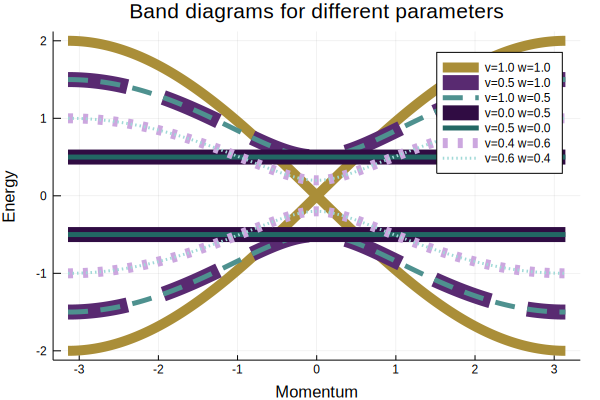

In [8]:
plot()
for ii in 1:length(va)
    plot!(ks,R.(ks,va[ii],wa[ii])
        ,label="v=$(va[ii]) w=$(wa[ii])"
        ,linewidth=widths[ii],color=colors[ii],linestyle=styles[ii])
    
    plot!(ks,-R.(ks,va[ii],wa[ii])
        ,label=""
        ,linewidth=widths[ii],color=colors[ii],linestyle=styles[ii])
end
plot!(title="Band diagrams for different parameters",
xlabel="Momentum",ylabel="Energy")

## Homotopy of Hamiltonian Vector

We can look at <b>either</b> the homotopy of the Hamiltonian <b>or</b> the homotopy of the eigenfunctions. 

Looking at the Hamiltonian seems easier since we don't have to go through the work of calculating the wavefunctions, especially if we have a complicated system, but homotopy is a geometric, almost pictoral thing. How do we go about getting something like that from an operator?  

Let's go back to how we wrote our Hamiltonian down, both this one and the QAHE one before,
$$
\mathcal{H}=\vec{R}(k) \cdot \vec{\sigma}.
$$
Here we have a 1-1 correspondance between the Hamiltonian and a <b>geometric</b> object, this $\vec{R}$ vector.  When we look at how it depends on $k$, we get insight into how $\mathcal{H}$ depends on $k$ as well.

The two different groups, purple and turquoise, will have two different behaviors.  $\vec{R}(k)$ for purple will circle the origin like $S^1$ the unit circle, where as $\vec{R}(k)$ for turquoise not circle the origin and will not be like $S^1$.

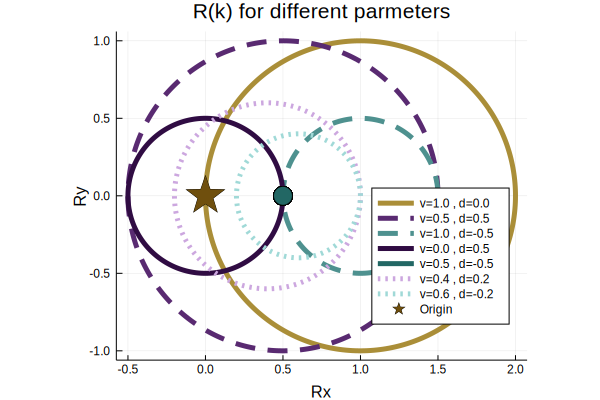

In [25]:
plot()
for ii in 1:length(va)
    plot!(Rx.(ks,va[ii],wa[ii]),
        Ry.(ks,va[ii],wa[ii])
    ,label="v=$(va[ii]) , d=$(da[ii])"
    ,linewidth=5,color=colors[ii],linestyle=styles[ii])
end

statval=5
scatter!(Rx.(ks,va[statval],wa[statval]),Ry.(ks,va[statval],wa[statval])
    ,label="",markersize=10,color=colors[statval])

scatter!([0],[0],label="Origin",
        markersize=20,markershape=:star5,color=colorant"#6f4f0d")

plot!(title="R(k) for different parmeters",
xlabel="Rx", ylabel="Ry",legend=:bottomright,aspect_ratio=1)

If instead we parameterize 

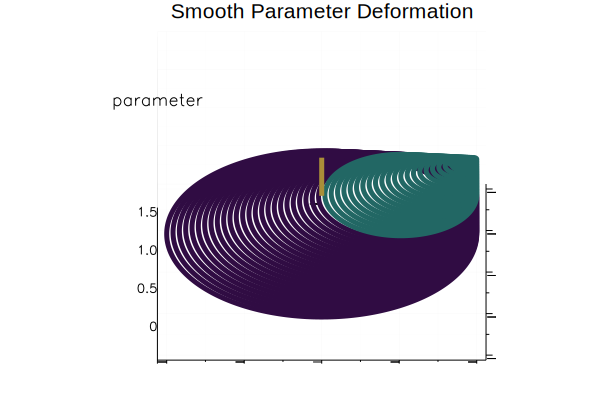

In [26]:
plot(legend=:false)

for t = range(0,stop=1,length=50)
    if t<.5
        plot!(Rx.(ks,t,1-t),Ry.(ks,t,1-t),t*ones(length(ks))
        ,color=colorant"#310c43",linewidth=5)
    else
        plot!(Rx.(ks,t,1-t),Ry.(ks,t,1-t),t*ones(length(ks))
        ,color=colorant"#226764",linewidth=5)
    end
end
plot!([0,0],[0,0],[.5,1],color=colorant"#aa8e39",linewidth=5)
plot!(title="Smooth Parameter Deformation",xlabel="Rx",ylabel="Ry",zlabel="parameter"
    ,viewangle=(0,60))

\begin{equation}
\frac{1}{\sqrt{2}}
\begin{bmatrix}
-1\\
\frac{R_x + i R_y}{R}
\end{bmatrix}
\end{equation}

In [27]:
um1=-1/sqrt(2)

function um2(k::Float64,v=1,w=2)
    return 1/(sqrt(2)*R(k,v,w))*(Rx(k,v,w)+im*Ry(k,v,w))
end

um2 (generic function with 3 methods)

In plotting the phase for the different parameter combinations, we can really see the differences between the topological phases.  In the turquoise group that didn't encircle zero $(v=1.0,w=0.6)$ and $(v=1.0, w=0.0)$, the phase changes sinusoidally, going up then back down again, so on and so forth around zero.

But for our purple states, $(v=0.0, x=1.0)$ and $(v=0.6,w=1.0)$, as well as the gap closed state $(v=1.0, w=1.0)$, the phase just keeps increasing, so we get jumps as we confine it between $-\pi$ and $\pi$. The phase itself is continuous; it just goes across a branch cut which gives us a discontinuity in how we write it down.  

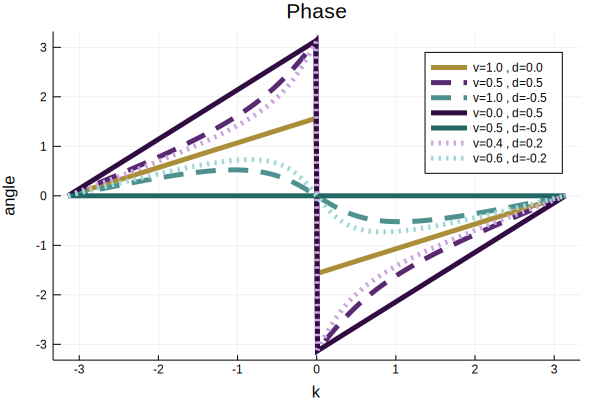

In [28]:
plot()
for ii in 1:length(va)
    plot!(ks,angle.(um2.(ks,va[ii],wa[ii]))
    ,label="v=$(va[ii]) , d=$(da[ii])",linewidth=5
    ,color=colors[ii],linestyle=styles[ii])
end
plot!(title="Phase",xlabel="k",ylabel="angle")

We can look at the effect of our decision of how to take an angle by rotating the system applying the $-\pi$-$\pi$ boundary.  

If we rotate the system by $\pi/4$ first, the discontinuity in the $(v=0.6,w=1.0)$ system occurs at a different k-location.  If you look back at the post on the Chern number and the Quantum Anomolous Hall Effect, this was the key aspect of something topologically non-trivial.  We can write something differently and make a problem area occur in a different spot, but it's still going to occur somewhere.  We can't get rid of the wrapping behaviour of the $(v=0.6,w=1.0)$ system by any amount of looking at it differently or smooth manipulations.  We can only move the discontinuity that arises from it to a different location.

As for the gold $(v=1.0,w=1.0)$ and $(v=0.0,w=1.0)$, those are both boundary cases with more complicated behavior.



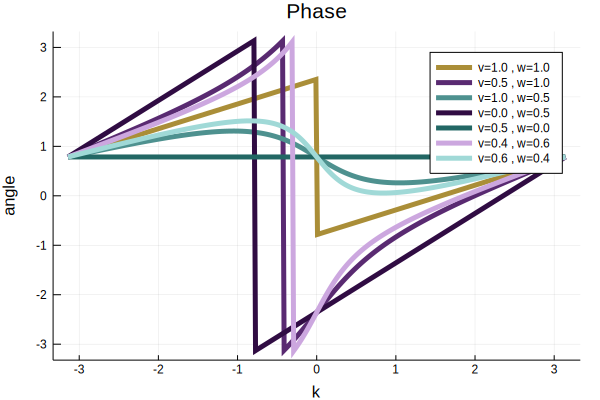

In [29]:
plot()
for ii in 1:length(va)
    plot!(ks,angle.(exp(im*π/4)*um2.(ks,va[ii],wa[ii]))
    ,label="v=$(va[ii]) , w=$(wa[ii])",linewidth=5
    ,color=colors[ii])
end
plot!(title="Phase",xlabel="k",ylabel="angle")

$$

$$

$$
\frac{1}{2\pi i} \oint \frac{dz}{z}
$$

In [34]:
function Winding_phi(k,v,w)
    dum2=(um2.(k[2:end],v,w).-um2.(k[1:(end-1)],v,w))
    return 1/(2π*im)*sum(dum2./um2.(k[2:end],v,w) )
end

Winding_phi (generic function with 2 methods)

In [37]:
println("sign \t n \t d \t v \t w \t Real \t Imag")
for ii in 1:length(va)
    temp=Winding_phi(ks,va[ii],wa[ii])
    
    println(sign(da[ii]),"\t",round(real(temp),digits=1),"\t",
        da[ii],"\t",va[ii],"\t",wa[ii],"\t",real(temp),"\t",imag(temp))
end

sign 	 n 	 d 	 v 	 w 	 Real 	 Imag
0.0	0.5	0.0	1.0	1.0	0.49679677033003244	-0.32080309095496856
1.0	1.0	0.5	0.5	1.0	0.9998936702040968	-0.011708935935834037
-1.0	0.0	-0.5	1.0	0.5	5.595515834858966e-6	-0.0016726850757912486
1.0	1.0	0.5	0.0	0.5	0.9999328399422549	-0.010036700185652588
-1.0	0.0	-0.5	0.5	0.0	0.0	0.0
1.0	1.0	0.2	0.4	0.6	0.9998200549998338	-0.01404913237891273
-1.0	0.0	-0.2	0.6	0.4	3.2221765631567825e-5	-0.004013887679864338


In [48]:
vaa=repeat(range(0,1,length=100),1,100)
waa=transpose(vaa)

ϕaa=zeros(Complex{Float64},100,100)
for ii in 1:100
    for jj in 1:100
        ϕaa[ii,jj]=Winding_phi(ks,vaa[ii,jj],waa[ii,jj])
    end
end

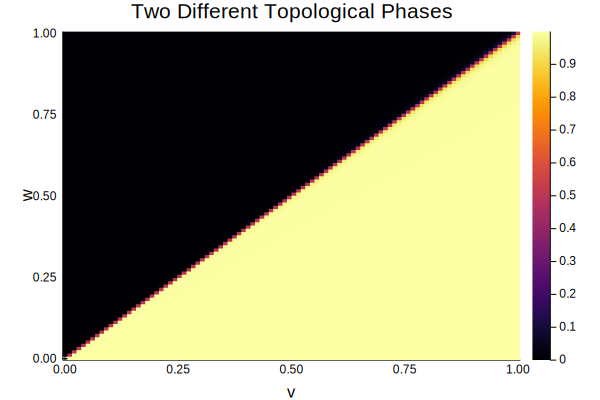

In [58]:
heatmap(vaa[:,1],waa[1,:],real.(ϕaa))
plot!(xlabel="v",ylabel="w", title="Two Different Topological Phases")

[1] Public Domain, https://commons.wikimedia.org/w/index.php?curid=1499462

[2] Chen, Xie, Zheng-Cheng Gu, and Xiao-Gang Wen. "Local unitary transformation, long-range quantum entanglement, wave function renormalization, and topological order." Physical review b 82.15 (2010): 155138. https://arxiv.org/pdf/1004.3835.pdf